In [102]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import sys
import seaborn as sns
df = pd.read_csv('/Users/PC/Desktop/finish/sentiment-analysis.csv')
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."
...,...
93,"""I can't stop listening to this song. It's my ..."
94,"""Their website is so confusing and poorly desi..."
95,"""I had an incredible experience at the theme p..."
96,NaN


In [103]:
# Resetting the index
df.reset_index(inplace=True)

In [104]:
df = df.rename_axis('1', axis=0)
df

,index,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
1,,
0,0,"""I love this product!"", Positive, Twitter, 202..."
1,1,"""The service was terrible."", Negative, Yelp Re..."
2,2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,3,"""I'm so disappointed with their customer suppo..."
4,4,"""Just had the best meal of my life!"", Positive..."
...,...,...
93,93,"""I can't stop listening to this song. It's my ..."
94,94,"""Their website is so confusing and poorly desi..."
95,95,"""I had an incredible experience at the theme p..."


In [105]:
df = pd.read_csv('/Users/PC/Desktop/finish/sentiment-analysis.csv',header = None)
df.head() 
df=df[[0]]
df.rename(columns={0:'comments'},inplace=True)
df

,comments
0,"Text, Sentiment, Source, Date/Time, User ID, L..."
1,"""I love this product!"", Positive, Twitter, 202..."
2,"""The service was terrible."", Negative, Yelp Re..."
3,"""This movie is amazing!"", Positive, IMDb, 2023..."
4,"""I'm so disappointed with their customer suppo..."
...,...
94,"""I can't stop listening to this song. It's my ..."
95,"""Their website is so confusing and poorly desi..."
96,"""I had an incredible experience at the theme p..."
97,NaN


In [106]:
#removal of white space

df['comments']=df['comments'].str.lower()
df['comments']

0     text, sentiment, source, date/time, user id, l...
1     "i love this product!", positive, twitter, 202...
2     "the service was terrible.", negative, yelp re...
3     "this movie is amazing!", positive, imdb, 2023...
4     "i'm so disappointed with their customer suppo...
                            ...                        
94    "i can't stop listening to this song. it's my ...
95    "their website is so confusing and poorly desi...
96    "i had an incredible experience at the theme p...
97                                                  NaN
98                                                  NaN
Name: comments, Length: 99, dtype: object

In [107]:
df['comments'][0]

'text, sentiment, source, date/time, user id, location, confidence score'

In [108]:
df['comments']=df['comments'].str.strip()
df['comments']

0     text, sentiment, source, date/time, user id, l...
1     "i love this product!", positive, twitter, 202...
2     "the service was terrible.", negative, yelp re...
3     "this movie is amazing!", positive, imdb, 2023...
4     "i'm so disappointed with their customer suppo...
                            ...                        
94    "i can't stop listening to this song. it's my ...
95    "their website is so confusing and poorly desi...
96    "i had an incredible experience at the theme p...
97                                                  NaN
98                                                  NaN
Name: comments, Length: 99, dtype: object

In [109]:
# Split the column with delimited data into separate columns
df[['review', 'sentiment', 'source','date','user','location','confidence']] = df['comments'].str.split(',', expand=True)

# Display the updated DataFrame
(df)

,comments,review,sentiment,source,date,user,location,confidence
0,"text, sentiment, source, date/time, user id, l...",text,sentiment,source,date/time,user id,location,confidence score
1,"""i love this product!"", positive, twitter, 202...","""i love this product!""",positive,twitter,2023-06-15 09:23:14,@user123,new york,0.85
2,"""the service was terrible."", negative, yelp re...","""the service was terrible.""",negative,yelp reviews,2023-06-15 11:45:32,user456,los angeles,0.65
3,"""this movie is amazing!"", positive, imdb, 2023...","""this movie is amazing!""",positive,imdb,2023-06-15 14:10:22,moviefan789,london,0.92
4,"""i'm so disappointed with their customer suppo...","""i'm so disappointed with their customer suppo...",negative,online forum,2023-06-15 17:35:11,forumuser1,toronto,0.78
...,...,...,...,...,...,...,...,...
94,"""i can't stop listening to this song. it's my ...","""i can't stop listening to this song. it's my ...",positive,spotify,2023-07-03 09:17:52,musiclover789,berlin,0.91
95,"""their website is so confusing and poorly desi...","""their website is so confusing and poorly desi...",negative,website review,2023-07-03 11:59:18,user789,toronto,0.68
96,"""i had an incredible experience at the theme p...","""i had an incredible experience at the theme p...",positive,trip report,2023-07-03 14:40:05,thrillseeker1,orlando,0.89
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df = df.iloc[1:].reset_index(drop=True)
df

,comments,review,sentiment,source,date,user,location,confidence
0,"""i love this product!"", positive, twitter, 202...","""i love this product!""",positive,twitter,2023-06-15 09:23:14,@user123,new york,0.85
1,"""the service was terrible."", negative, yelp re...","""the service was terrible.""",negative,yelp reviews,2023-06-15 11:45:32,user456,los angeles,0.65
2,"""this movie is amazing!"", positive, imdb, 2023...","""this movie is amazing!""",positive,imdb,2023-06-15 14:10:22,moviefan789,london,0.92
3,"""i'm so disappointed with their customer suppo...","""i'm so disappointed with their customer suppo...",negative,online forum,2023-06-15 17:35:11,forumuser1,toronto,0.78
4,"""just had the best meal of my life!"", positive...","""just had the best meal of my life!""",positive,tripadvisor,2023-06-16 08:50:59,foodie22,paris,0.88
...,...,...,...,...,...,...,...,...
93,"""i can't stop listening to this song. it's my ...","""i can't stop listening to this song. it's my ...",positive,spotify,2023-07-03 09:17:52,musiclover789,berlin,0.91
94,"""their website is so confusing and poorly desi...","""their website is so confusing and poorly desi...",negative,website review,2023-07-03 11:59:18,user789,toronto,0.68
95,"""i had an incredible experience at the theme p...","""i had an incredible experience at the theme p...",positive,trip report,2023-07-03 14:40:05,thrillseeker1,orlando,0.89
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_null = df.isnull()
df_null

,comments,review,sentiment,source,date,user,location,confidence
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
93,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False
96,True,True,True,True,True,True,True,True


In [112]:
(df.where(pd.notnull(df), 'NULL'))

# Remove rows with any null values
df_cleaned= df.dropna()
df_cleaned

,comments,review,sentiment,source,date,user,location,confidence
0,"""i love this product!"", positive, twitter, 202...","""i love this product!""",positive,twitter,2023-06-15 09:23:14,@user123,new york,0.85
1,"""the service was terrible."", negative, yelp re...","""the service was terrible.""",negative,yelp reviews,2023-06-15 11:45:32,user456,los angeles,0.65
2,"""this movie is amazing!"", positive, imdb, 2023...","""this movie is amazing!""",positive,imdb,2023-06-15 14:10:22,moviefan789,london,0.92
3,"""i'm so disappointed with their customer suppo...","""i'm so disappointed with their customer suppo...",negative,online forum,2023-06-15 17:35:11,forumuser1,toronto,0.78
4,"""just had the best meal of my life!"", positive...","""just had the best meal of my life!""",positive,tripadvisor,2023-06-16 08:50:59,foodie22,paris,0.88
...,...,...,...,...,...,...,...,...
91,"""just had the most amazing vacation! i can't w...","""just had the most amazing vacation! i can't w...",positive,tripadvisor,2023-07-02 18:01:23,travelenthusiast1,sydney,0.93
92,"""the food at this restaurant was awful. never ...","""the food at this restaurant was awful. never ...",negative,zomato,2023-07-02 20:45:37,foodlover123,mumbai,0.55
93,"""i can't stop listening to this song. it's my ...","""i can't stop listening to this song. it's my ...",positive,spotify,2023-07-03 09:17:52,musiclover789,berlin,0.91
94,"""their website is so confusing and poorly desi...","""their website is so confusing and poorly desi...",negative,website review,2023-07-03 11:59:18,user789,toronto,0.68


In [113]:
df['source'].value_counts()

source
online store           11
spotify                 9
zomato                  7
website review          7
goodreads               6
yelp reviews            6
imdb                    6
tripadvisor             6
website testimonial     4
online chat             4
event review            3
music review            3
theme park review       3
twitter                 2
amazon reviews          2
online forum            2
trip report             2
retail store            2
online helpdesk         2
hotel review            2
airline review          1
gaming forum            1
travel website          1
food blog               1
tv show review          1
art review              1
travel blog             1
Name: count, dtype: int64

<Axes: title={'center': 'review sources'}, xlabel='source'>

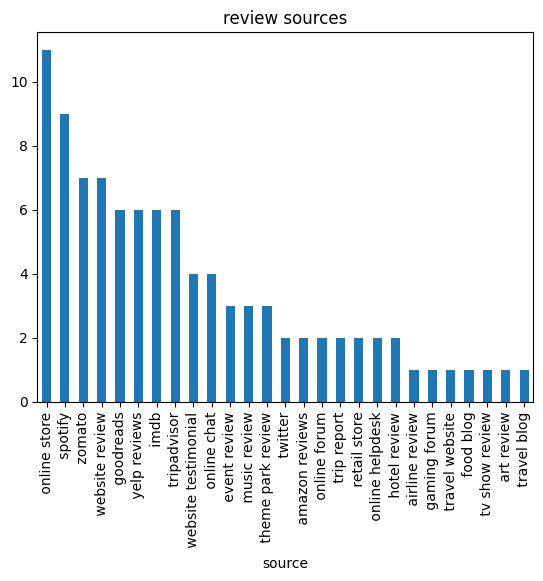

In [114]:
df['source'].value_counts().plot(kind='bar',title = 'review sources')

In [115]:
df['char_length'] = df['review'].str.len()
df['char_length']

0     22.0
1     27.0
2     24.0
3     50.0
4     36.0
      ... 
93    60.0
94    52.0
95    64.0
96     NaN
97     NaN
Name: char_length, Length: 98, dtype: float64

In [116]:
#Tokenization 

from nltk.tokenize import word_tokenize

In [117]:
df['review'] = df['review'].astype(str)
df['review']

0                                "i love this product!"
1                           "the service was terrible."
2                              "this movie is amazing!"
3     "i'm so disappointed with their customer suppo...
4                  "just had the best meal of my life!"
                            ...                        
93    "i can't stop listening to this song. it's my ...
94    "their website is so confusing and poorly desi...
95    "i had an incredible experience at the theme p...
96                                                  nan
97                                                  nan
Name: review, Length: 98, dtype: object

In [118]:
from nltk.tokenize import word_tokenize
df['tokenized_word'] = df['review'].apply(word_tokenize)
df['tokenized_word'] 

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\PC/nltk_data'
    - 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\PC\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [24]:
df['char_length'] = df['review'].str.len()
df['char_length']

0     22
1     27
2     24
3     50
4     36
      ..
93    60
94    52
95    64
96     3
97     3
Name: char_length, Length: 98, dtype: int64

<Axes: ylabel='count'>

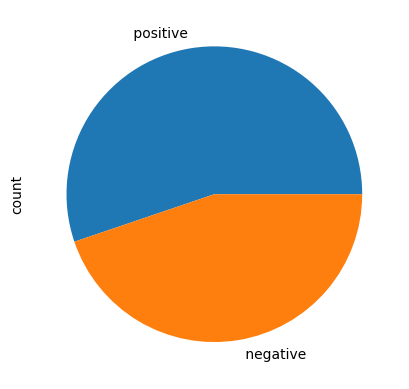

In [25]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='pie')

<Axes: title={'center': 'review sources'}, xlabel='location'>

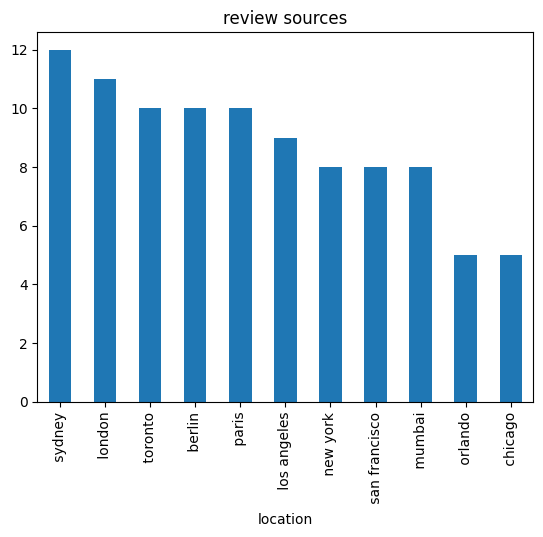

In [26]:
df['location'].value_counts().plot(kind='bar',title = 'review sources')

In [27]:
sentiment_by_location = df.groupby(['location', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_location 

sentiment,negative,positive
location,,
berlin,0,10
chicago,5,0
london,2,9
los angeles,7,2
mumbai,6,2
new york,0,8
orlando,0,5
paris,3,7
san francisco,8,0


<Axes: title={'center': 'sentiment basis of location'}, xlabel='location'>

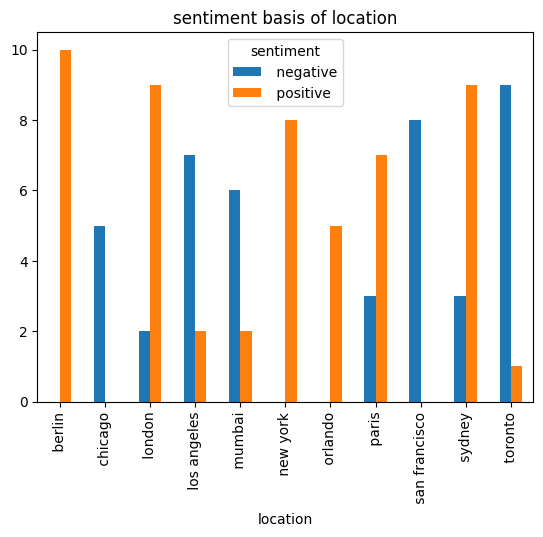

In [28]:
sentiment_by_location.plot(kind='bar',title = 'sentiment basis of location')